In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [156]:
df = pd.read_csv("CTA_data.csv")

In [129]:
df.dropna(axis=0, inplace = True)
df['date'] = pd.to_datetime(df['service_date'])

In [130]:
df.head()

,service_date,day_type,bus,rail_boardings,total_rides,date
0,01/01/2001,U,297192,126455,423647,2001-01-01
1,01/02/2001,W,780827,501952,1282779,2001-01-02
2,01/03/2001,W,824923,536432,1361355,2001-01-03
3,01/04/2001,W,870021,550011,1420032,2001-01-04
4,01/05/2001,W,890426,557917,1448343,2001-01-05


In [131]:
df.drop(columns= ['service_date'], axis = 1, inplace = True)
df.set_index('date', inplace = True)

In [132]:
mean = df.resample('M').mean()
median = df.resample('M').median()
std = df.resample('M').std()

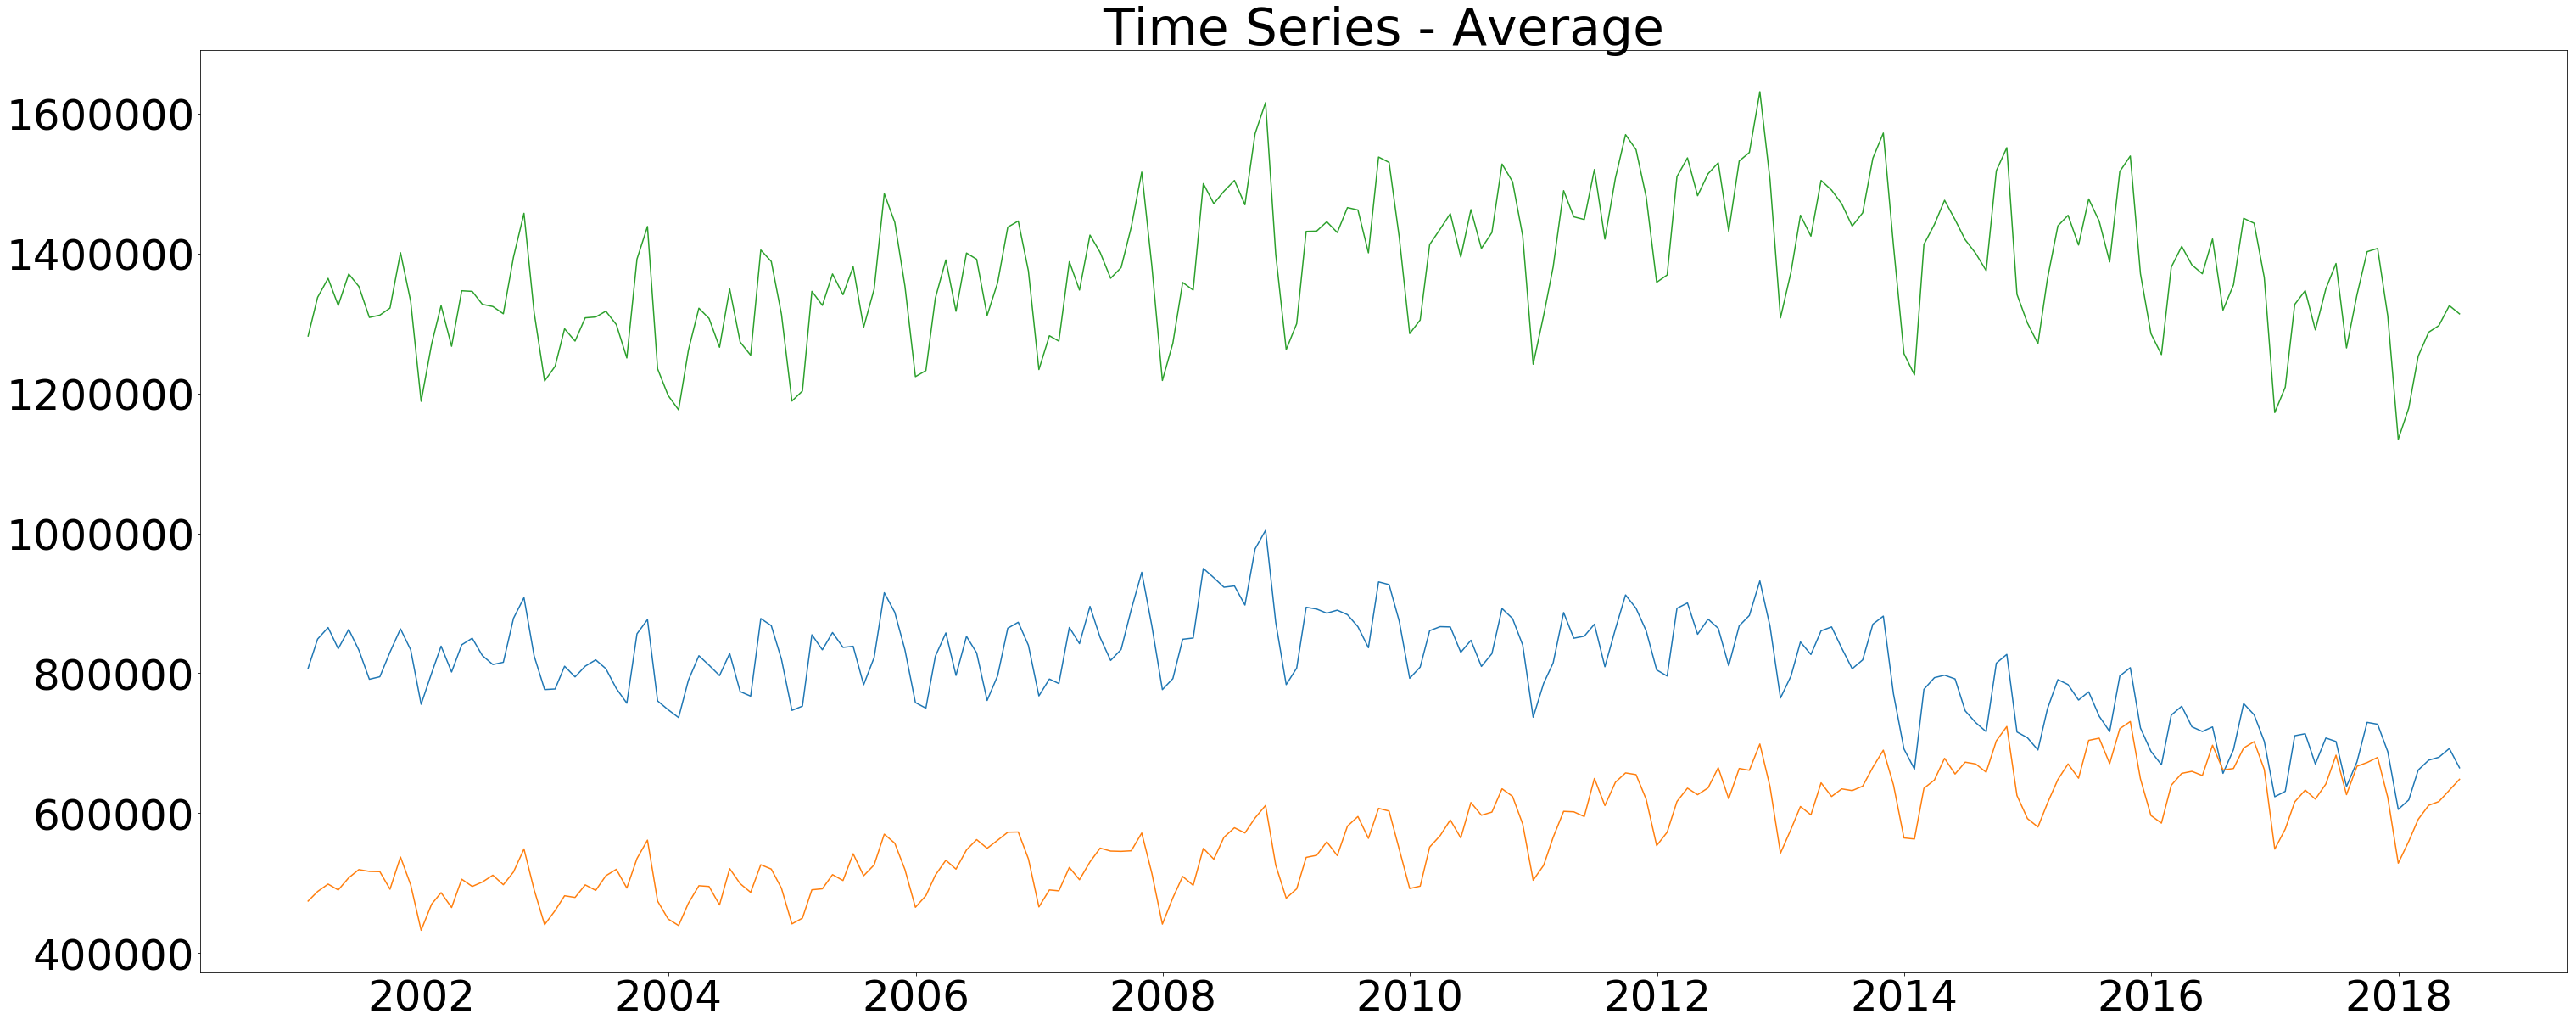

In [133]:
plt.figure(figsize=(50, 20))
plt.rcParams['font.size'] = 50
plt.plot(mean)
plt.title('Time Series - Average')
plt.show()

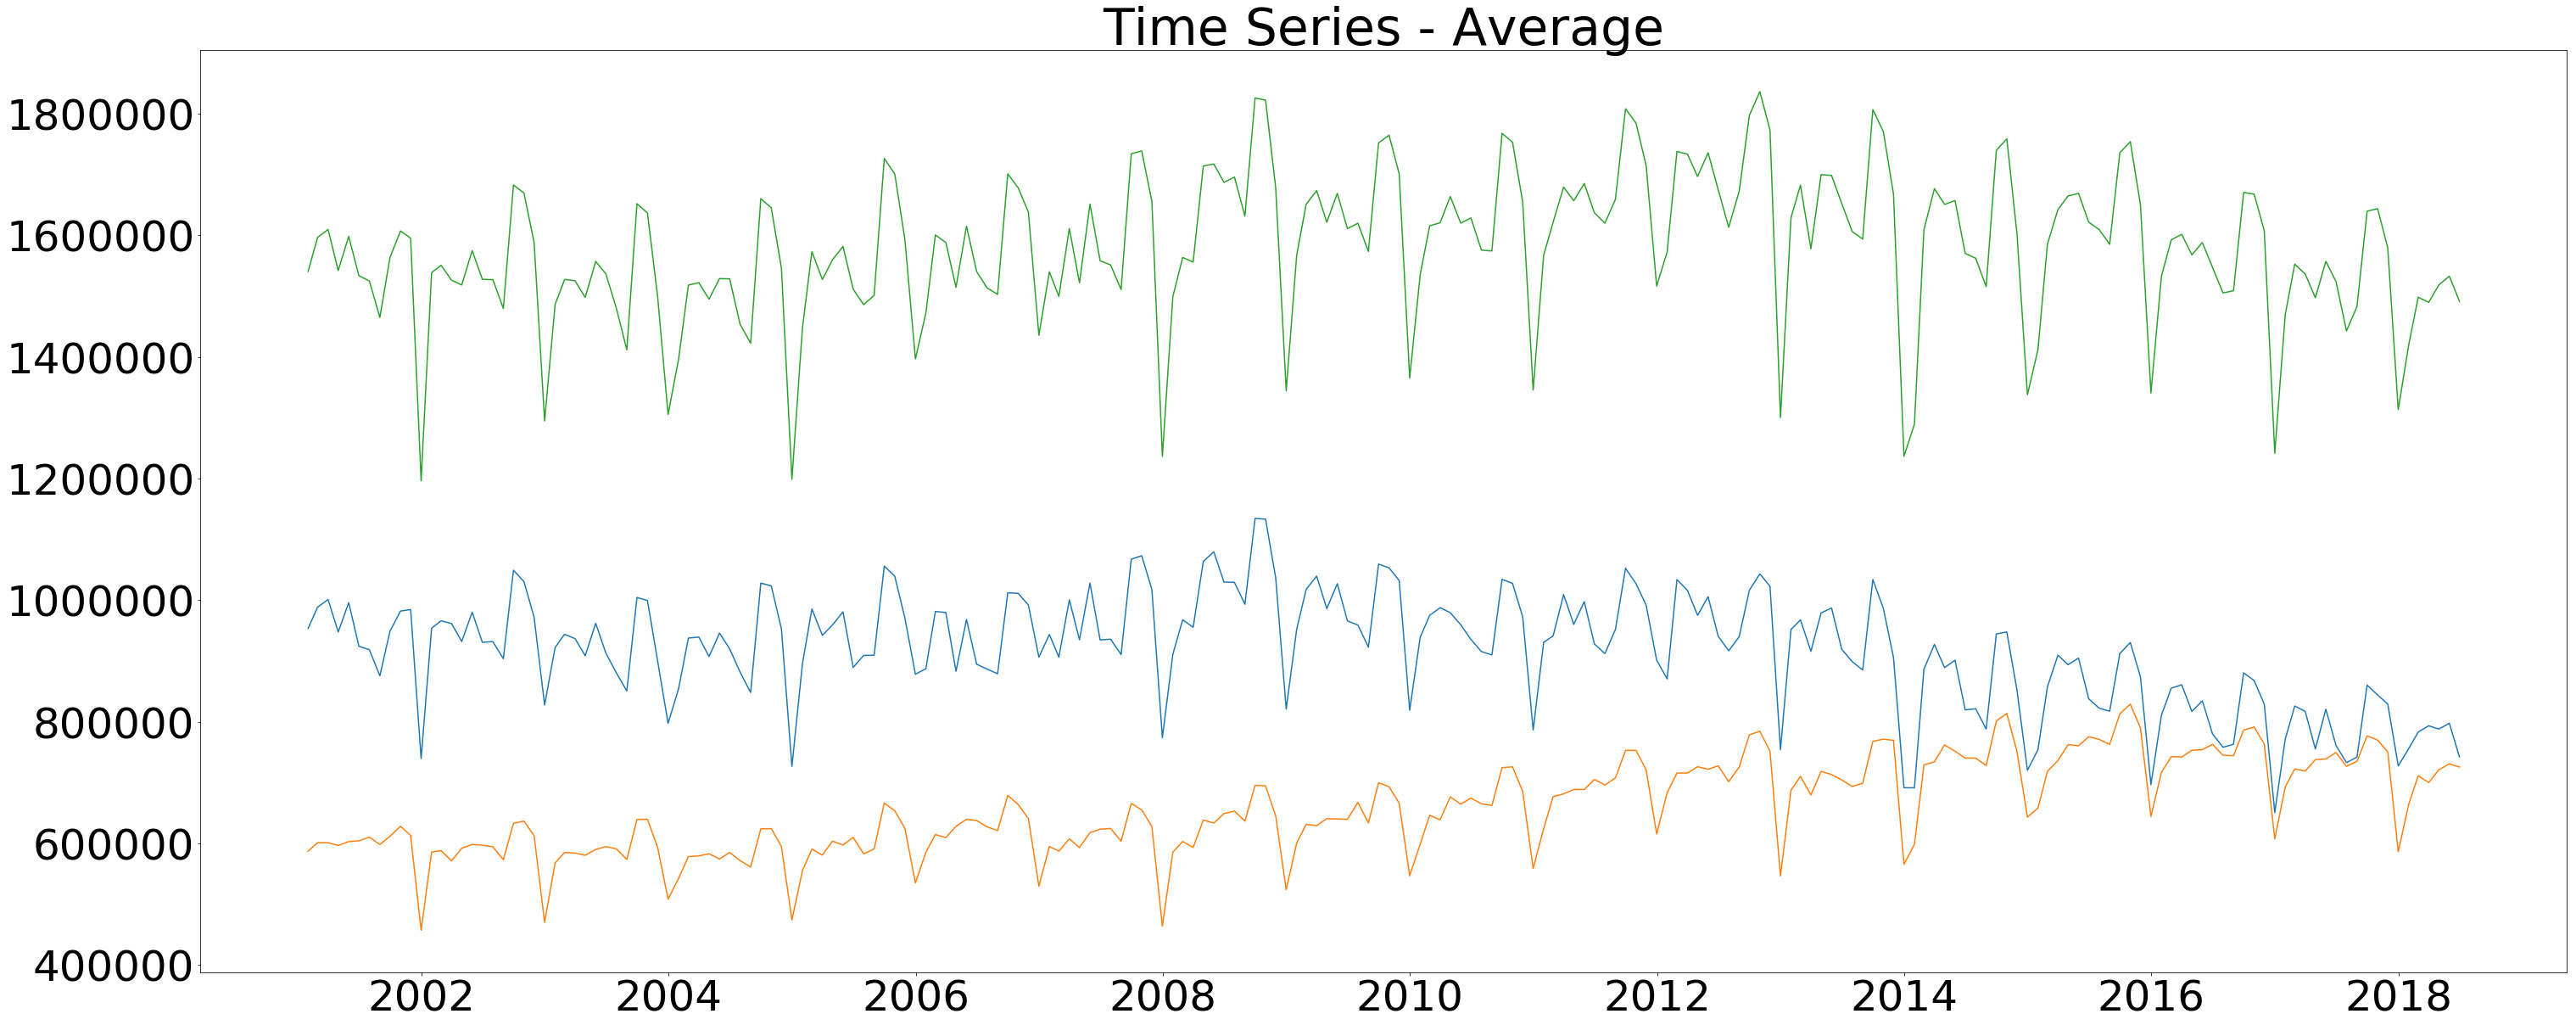

In [134]:
plt.figure(figsize=(50, 20))
plt.rcParams['font.size'] = 50
plt.plot(median)
plt.title('Time Series - Median')
plt.show()

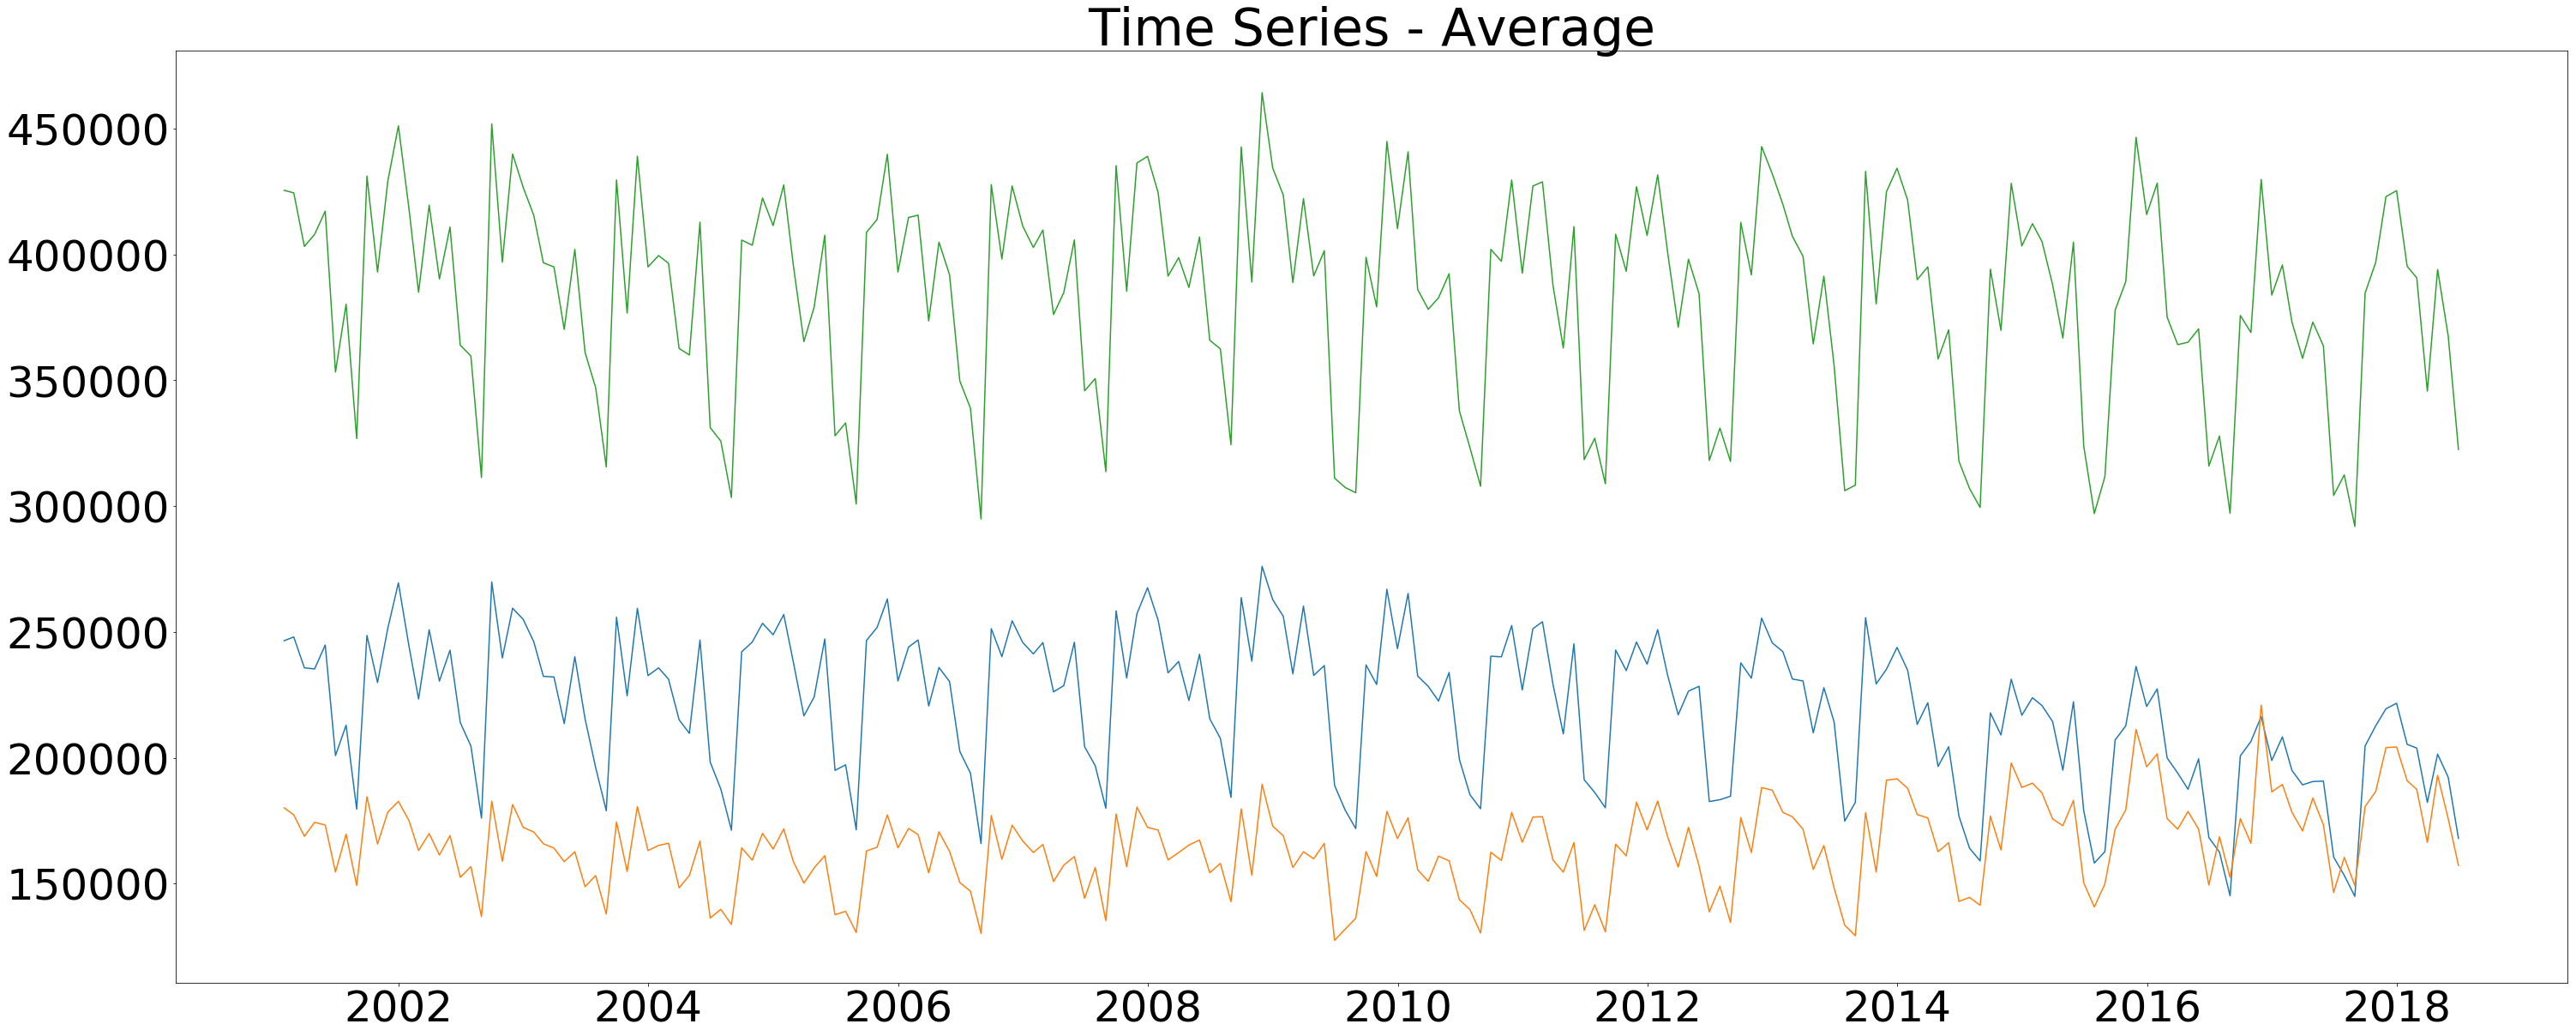

In [135]:
plt.figure(figsize=(50, 20))
plt.rcParams['font.size'] = 50
plt.plot(std)
plt.title('Time Series - Standard Deviation')
plt.show()

In [136]:
df.drop(columns = ['bus', 'rail_boardings', 'day_type'], axis=1, inplace = True)
df_months = df.resample('M').mean()

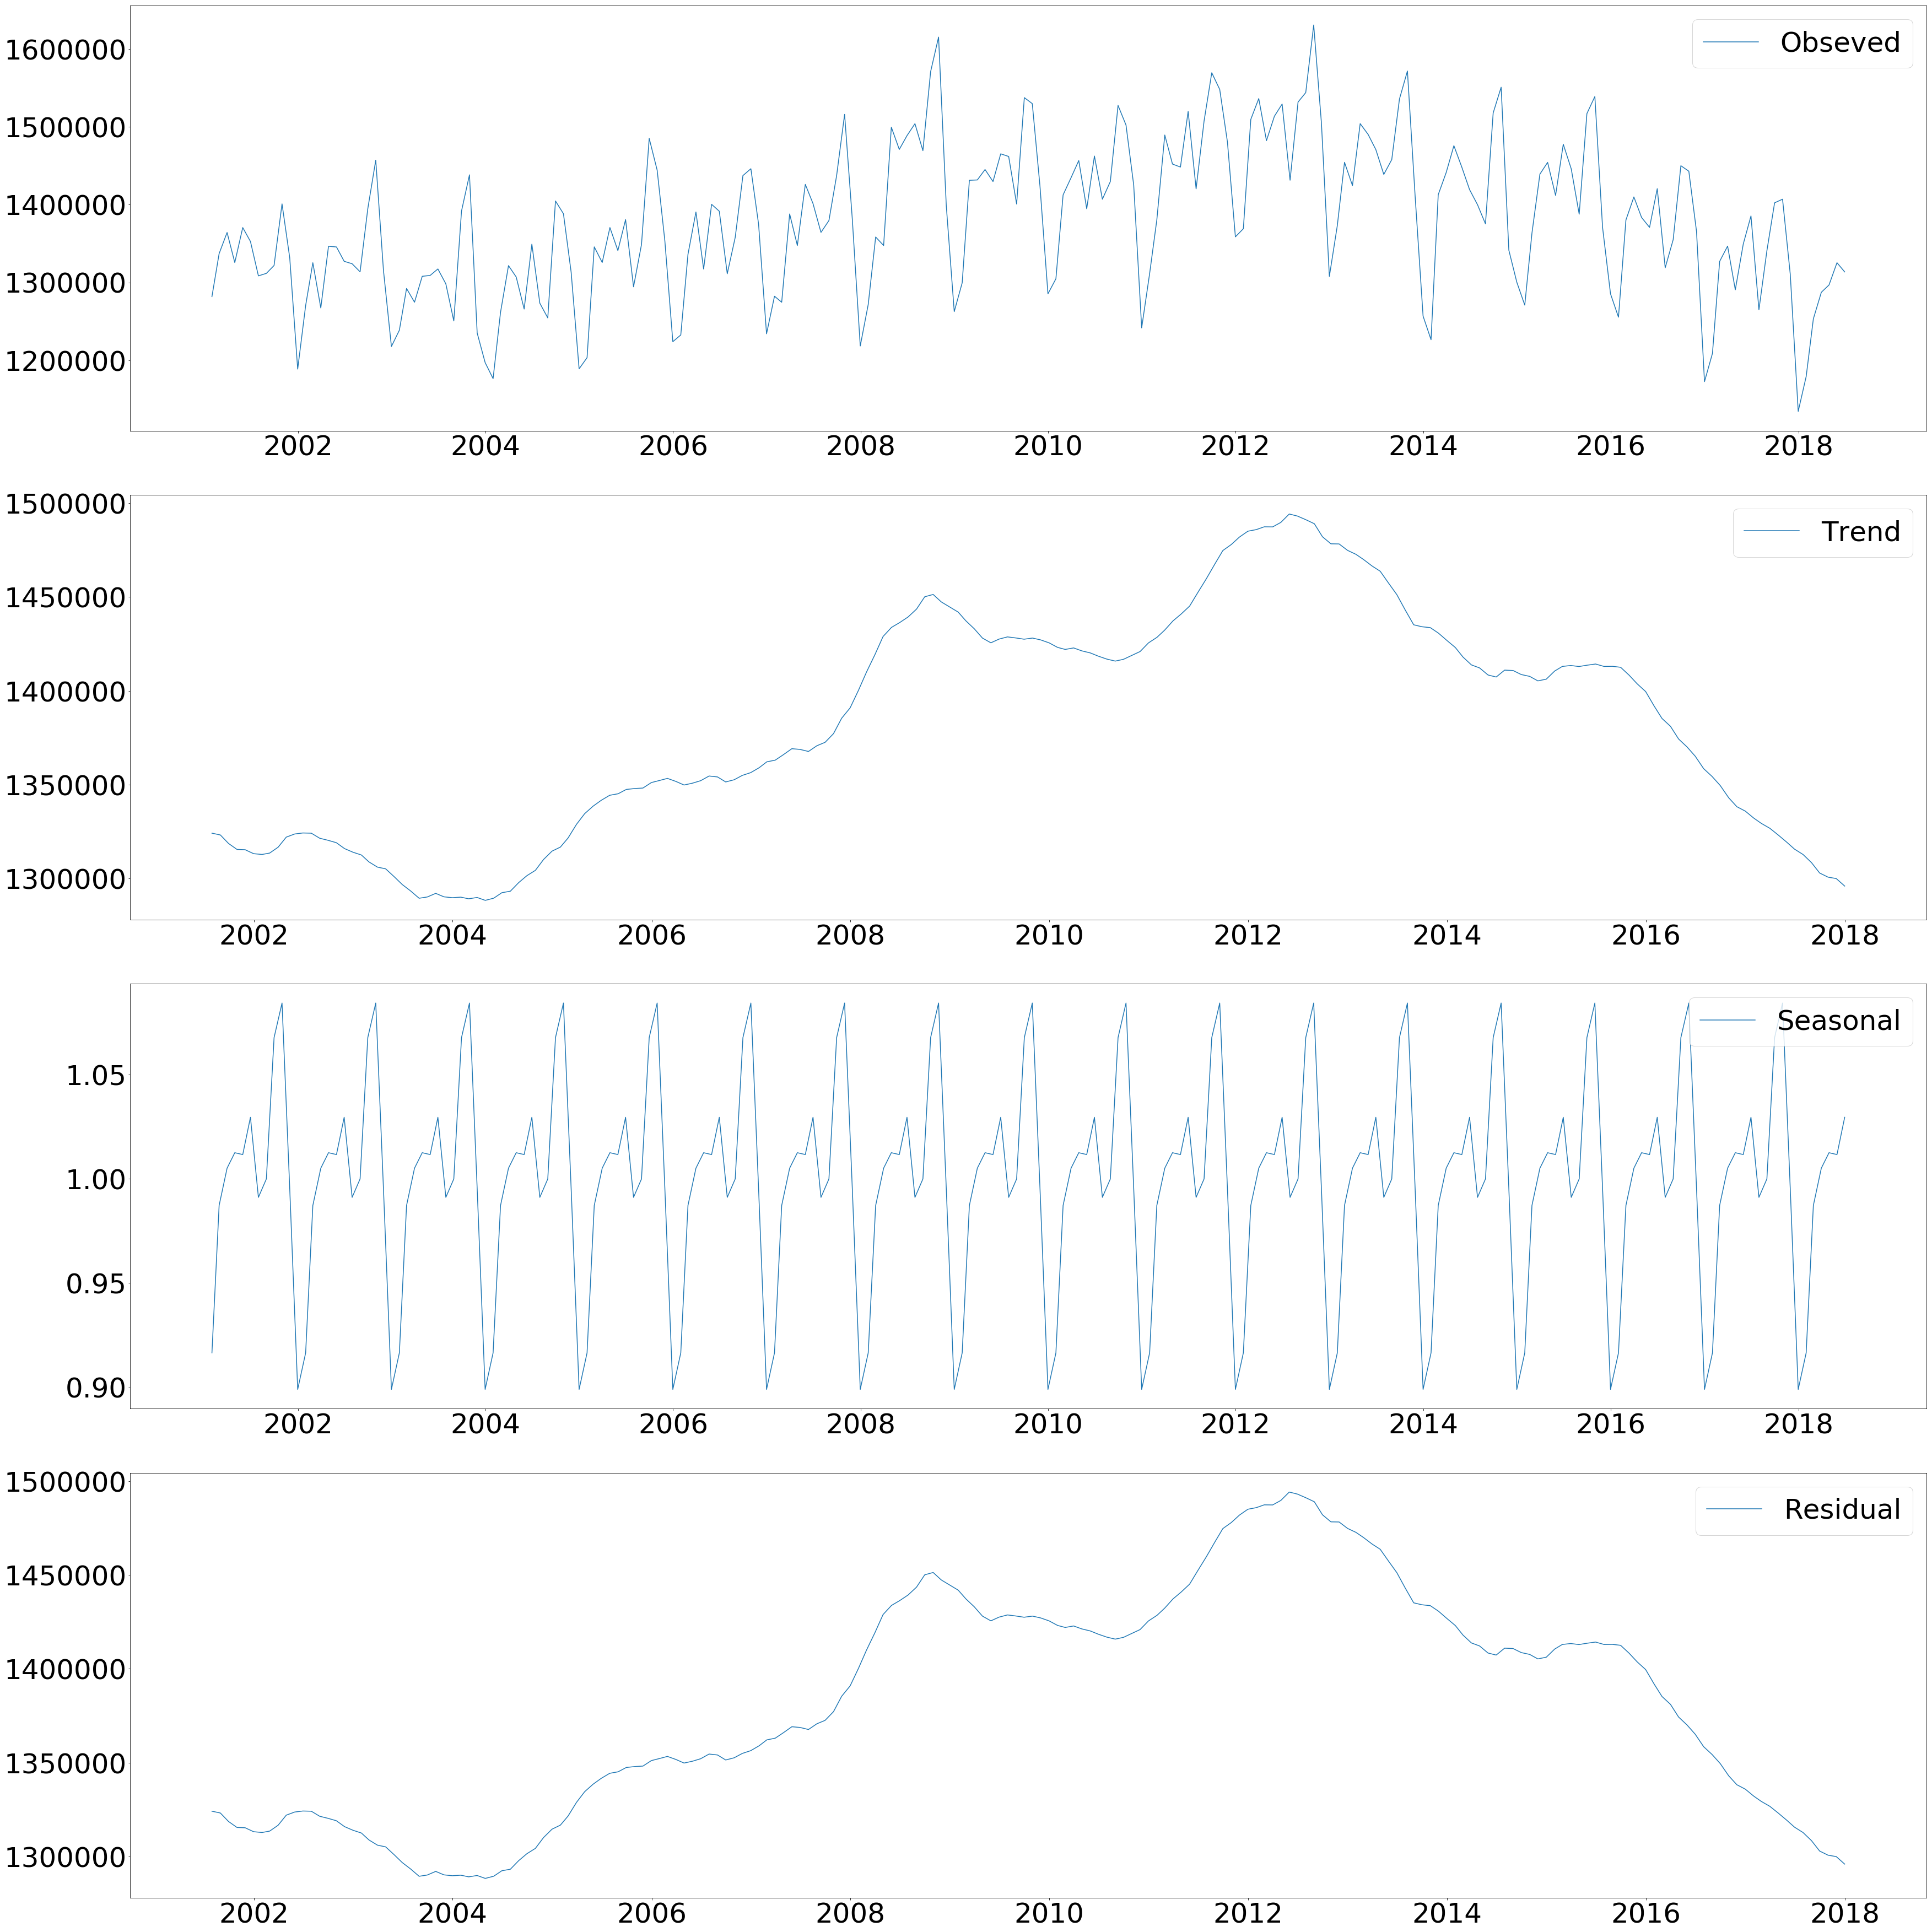

In [155]:
decomposition = sm.tsa.seasonal_decompose(df_months, model ='multiplicative', freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#Plotting
plt.figure(figsize=(50, 50))
plt.rcParams['font.size'] = 50

#observed
plt.subplot(411)
plt.plot(df_months, label = 'Obseved')
plt.legend(loc='best')

#trend
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

#seasonality
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')

#residual
plt.subplot(414)
plt.plot(trend, label = 'Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()